Text(0, 0.5, 'T(N.m)')

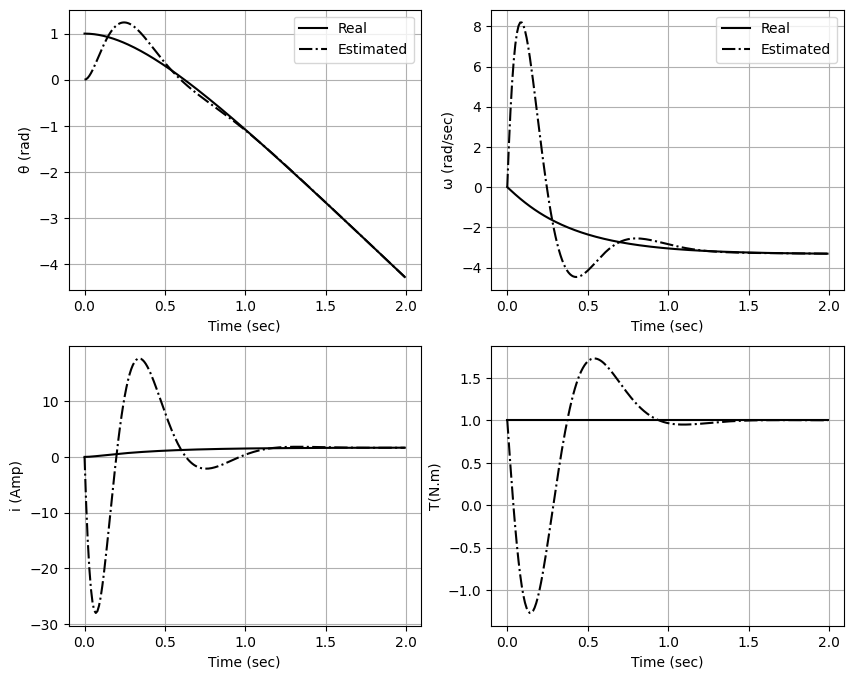

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

class Parameters:
    def __init__(self, Tl):
        self.Tl = Tl

# Define global parameters
Par = Parameters(Tl=1)

def DC_motor_Obs(t, X):
    # Extract state variables
    x = X[:3]
    xh = X[3:]

    # Real System Matrices
    A = np.array([[0, 1, 0],
                  [0, 0, 4.438],
                  [0, -12, -24]])
    B = np.array([[0, 0],
                  [0, -7.396],
                  [20, 0]])
    C = np.array([1, 0, 0])

    Tl = Par.Tl  # Step disturbance
    v = 0
    u = np.array([v, Tl])

    # Real System Model
    xp = A @ x + B @ u
    y = C @ x

    # Observer Matrices
    Ah = np.array([[0, 1, 0, 0],
                   [0, 0, 4.438, -7.396],
                   [0, -12, -24, 0],
                   [0, 0, 0, 0]])
    Bh = np.array([0, 0, 20, 0])
    Ch = np.array([1, 0, 0, 0])
    G = np.array([0, 234.7440, -936.9136, -27.6050])

    # Observer Model
    xhp = Ah @ xh + Bh * v + G * (y - Ch @ xh)

    # Augment the real and estimated states
    Xp = np.concatenate((xp, xhp))

    return Xp

# Initial conditions
x0 = np.array([1, 0, 0, 0, 0, 0, Par.Tl])

# Time span
tspan = [0, 2]

# Solve ODE
sol = solve_ivp(DC_motor_Obs, tspan, x0, method='RK45', t_eval=np.arange(0, 2, 0.01))

t = sol.t
x = sol.y.T
xh = x[:, 3:7]

# Plot results
plt.figure(figsize=(10, 8))

plt.subplot(221)
plt.plot(t, x[:, 0], 'k', label='Real')
plt.plot(t, xh[:, 0], '-.k', label='Estimated')
plt.grid()
plt.xlabel('Time (sec)')
plt.ylabel('θ (rad)')
plt.legend()

plt.subplot(222)
plt.plot(t, x[:, 1], 'k', label='Real')
plt.plot(t, xh[:, 1], '-.k', label='Estimated')
plt.grid()
plt.xlabel('Time (sec)')
plt.ylabel('ω (rad/sec)')
plt.legend()

plt.subplot(223)
plt.plot(t, x[:, 2], 'k', label='Real')
plt.plot(t, xh[:, 2], '-.k', label='Estimated')
plt.grid()
plt.xlabel('Time (sec)')
plt.ylabel('i (Amp)')

plt.subplot(224)
plt.plot(t, Par.Tl + t * 0, 'k', label='Real')
plt.plot(t, xh[:, 3], '-.k', label='Estimated')
plt.grid()
plt.xlabel('Time (sec)')
plt.ylabel('T(N.m)')